In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv('./data/application_train.csv')
data_test = pd.read_csv('./data/application_test.csv')

In [3]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
%run ./code/label_encoder.py

para sacar solo las etiquetas con cero para poder seleccionar solo la misma cantidad que hay con unos para balancear los datos a la hora de entrenar

In [5]:
data_train[data_train.loc[data_train.index,'TARGET']==0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
data_train = label_encoder(data_train)
data_test = label_encoder(data_test)

In [7]:
matriz_corr = data_train.corr()

In [8]:
matriz_corr.shape

(122, 122)

In [9]:
matriz_corr.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000769,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,-0.030896,0.054692,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008613,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241544,...,-0.007530,-0.005190,-0.007308,0.055821,0.000453,-0.005118,-0.015296,-0.014369,-0.021962,-0.052494
CODE_GENDER,-0.000769,0.054692,-0.008613,1.000000,0.345833,-0.044340,0.047403,0.074728,0.021572,0.076961,...,0.022205,0.004632,0.003258,0.023908,0.003176,0.001138,-0.001568,0.008959,-0.007465,-0.018220
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345833,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141588,...,-0.000097,0.002184,0.007299,0.006741,0.002669,0.000572,0.000242,0.020477,-0.009936,-0.036345


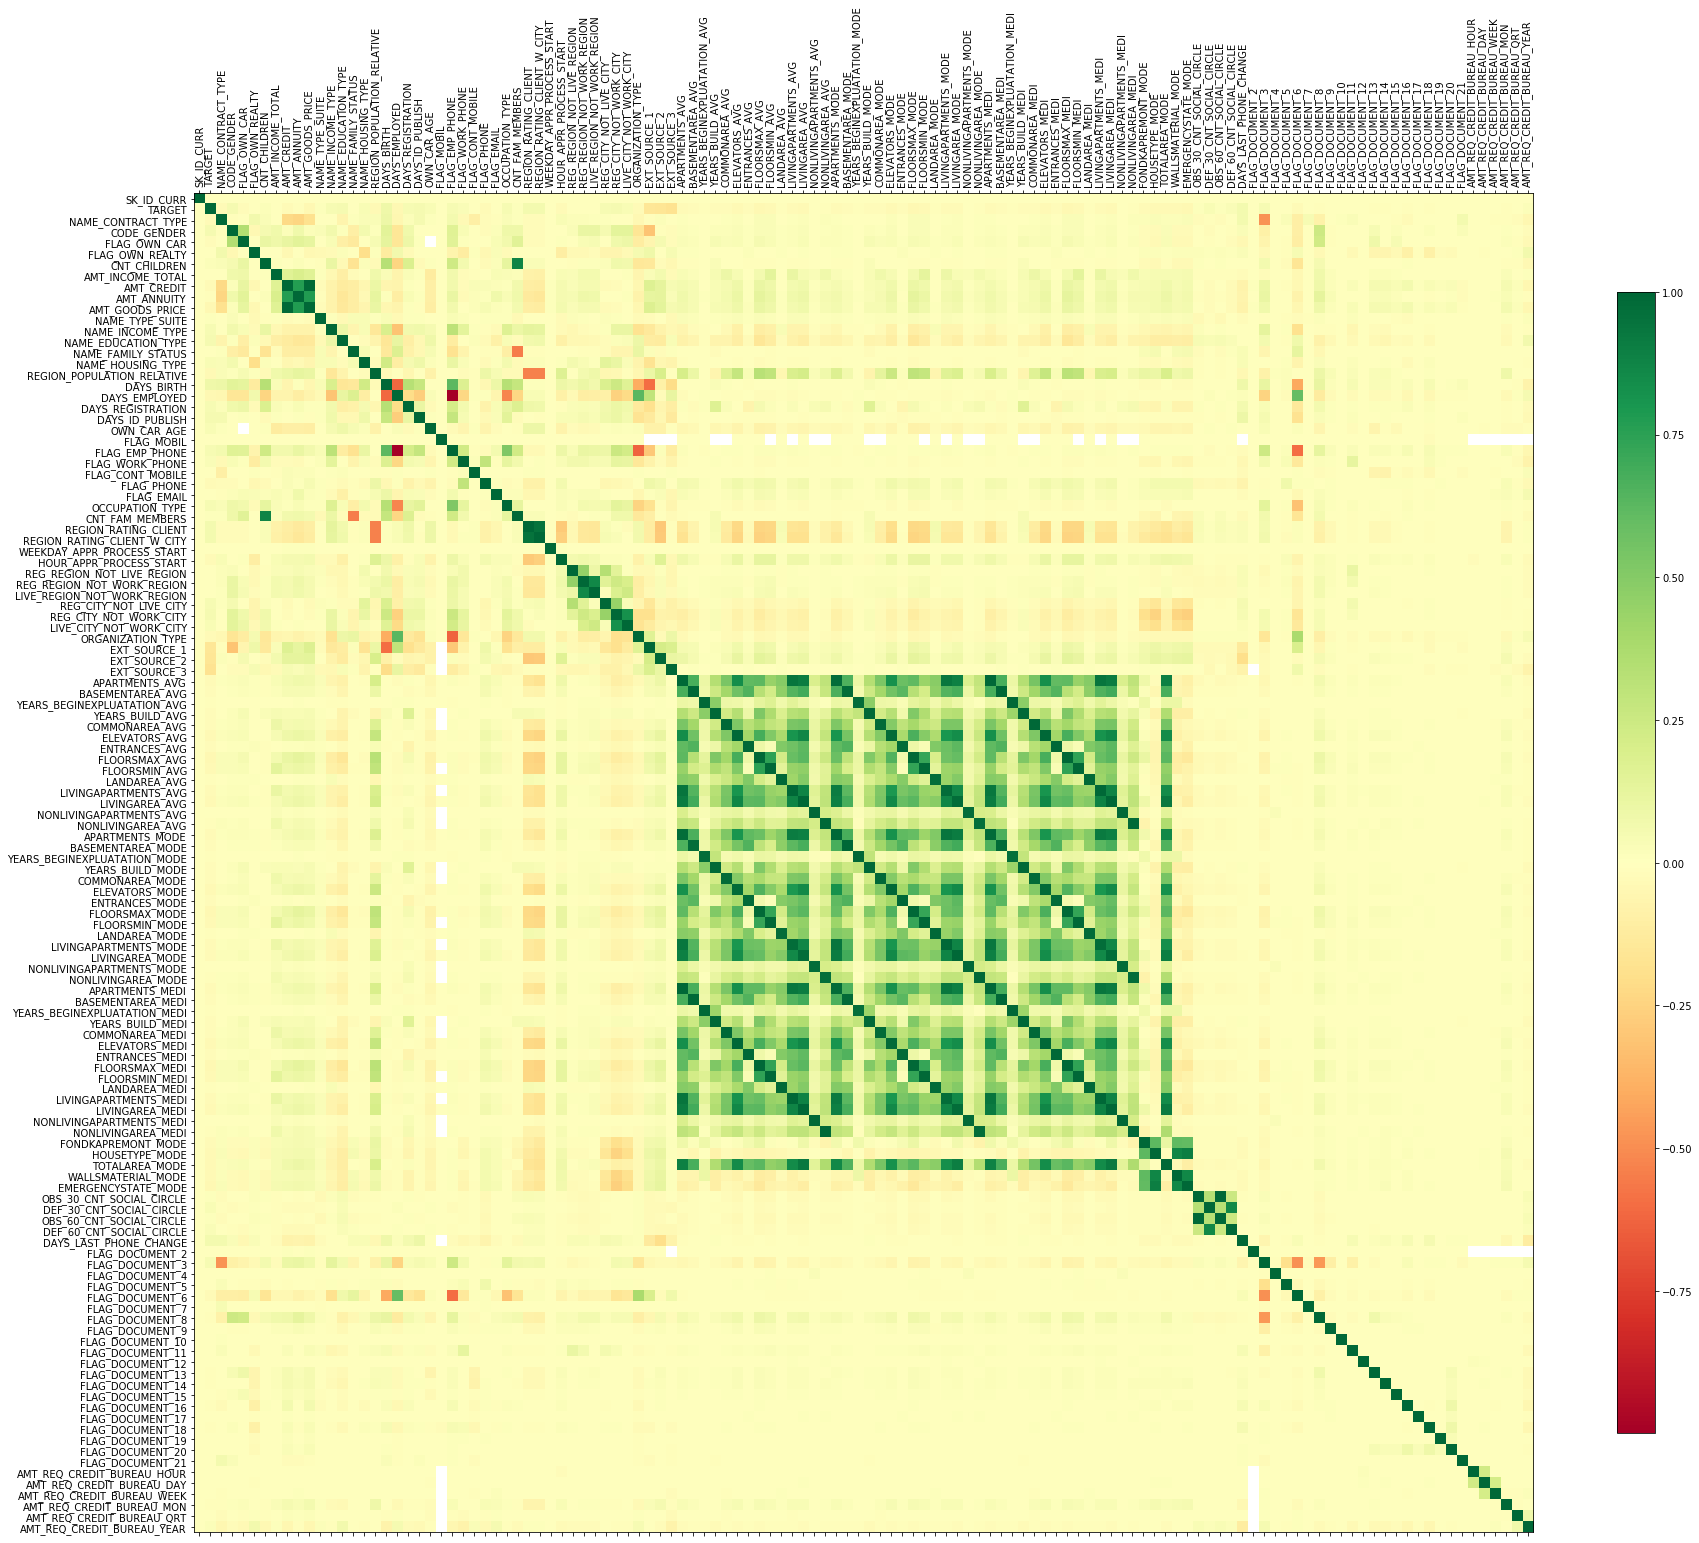

In [10]:
fig, ax = plt.subplots(figsize=(30,30))
cax = ax.matshow(matriz_corr, cmap='RdYlGn')
plt.xticks(range(len(matriz_corr.columns)), matriz_corr.columns, rotation=90)
plt.yticks(range(len(matriz_corr.columns)), matriz_corr.columns)

fig.colorbar(cax, shrink=.7, aspect=30);

In [33]:
col_best = matriz_corr.loc[:,((matriz_corr >= .99).sum() > 1)==True].columns

In [34]:
col_best

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [35]:
X_train = data_train[col_best].fillna(0)
y_train = data_train.TARGET

X_test = data_test[col_best].fillna(0)

X_train.shape, y_train.shape, X_test.shape

((307511, 30), (307511,), (48744, 30))

In [36]:
sum(y_train==0),sum(y_train==1)

(282686, 24825)

#### Debido a que está tan desbalanceado se cogera la misma cantidad para cada etiqueta

In [37]:
X_train.head()

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,...,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,2.0,2.0
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,...,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,1.0,1.0
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.0
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,2.0,2.0
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.0


In [38]:
%run ./code/compute_class_weigth.py

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [40]:
GBC.score(X_train, y_train)

0.91930369970505121

In [41]:
predict = GBC.predict_proba(X_test)

In [42]:
predict[:,1]

array([ 0.07456138,  0.09089666,  0.09089666, ...,  0.04647312,
        0.05144356,  0.09089666])

In [29]:
#con una correlación de  mayor a 0.7
result = pd.DataFrame(data=predict[:,1], index=data_test.SK_ID_CURR, columns=['TARGET'])
result.index.name = 'SK_ID_CURR'
result.to_csv('./results/submission_test_17.csv')

In [21]:
#con una correlación mayor a 0.9
result = pd.DataFrame(data=predict[:,1], index=data_test.SK_ID_CURR, columns=['TARGET'])
result.index.name = 'SK_ID_CURR'
result.to_csv('./results/submission_test_19.csv')

In [43]:
#con una correlación mayor o igual a 0.99
result = pd.DataFrame(data=predict[:,1], index=data_test.SK_ID_CURR, columns=['TARGET'])
result.index.name = 'SK_ID_CURR'
result.to_csv('./results/submission_test_20.csv')

In [49]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB( priors=(.1,.9))
GNB.fit(X_train, y_train)

GaussianNB(priors=(0.1, 0.9))

In [50]:
GNB.score(X_train,y_train)

0.17127842581240996

In [51]:
predict = GNB.predict_proba(X_test)

In [52]:
predict_proba = []
for i in predict:
    if i[0]>=[1]:
        predict_proba.append(i[0])
    else: predict_proba.append(i[1])

In [53]:
predict_proba

[0.95208352244559269,
 0.92870310703087189,
 0.65563746104328835,
 0.25666494415288754,
 0.95227925756605103,
 0.90456359161344113,
 0.95074942810424579,
 0.96208632976760755,
 0.96188194706131136,
 0.92017767589964738,
 0.54599361783008526,
 0.93096955537660286,
 0.94760236232392547,
 0.90723650492502927,
 0.94918410296588052,
 0.95506668759791935,
 0.94368880523375109,
 0.61050795574121863,
 0.97577620710519453,
 0.90736049093210647,
 0.96707059458065492,
 0.79390814169520396,
 0.6098952462978906,
 0.8015471097362461,
 0.95506028536502519,
 0.93484649770543304,
 0.62542224412060976,
 0.92696336899147758,
 0.9316402546106598,
 0.90488885276317899,
 0.95545484827510641,
 0.94849712876313963,
 0.97881643261524454,
 0.94652550787816747,
 0.93289649964311694,
 0.95738186920921209,
 6.7696290795060419e-05,
 0.97659982084877672,
 0.9144174983775285,
 0.96973453487082062,
 0.93877664582370024,
 0.61799570719907615,
 0.94819586293328417,
 0.93143101612943147,
 0.91938928437434975,
 0.89701662

In [54]:
result = pd.DataFrame(data=predict_proba, index=data_test.SK_ID_CURR, columns=['TARGET'])

In [55]:
result.index.name = 'SK_ID_CURR'

In [56]:
result.to_csv('./results/submission_test_10.csv')

In [48]:
np.mean(data_train.TARGET ==1), np.mean(data_train.TARGET ==0)

(0.080728819456864956, 0.91927118054313506)